## Race and Ethnicity of PGP Particpants

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Set default plot stype for matplotlib
plt.style.use('ggplot')

# Set default figure size for matplotlib
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Connect to untap database (using sqlite3), found here: 
# https://workbench.su92l.arvadosapi.com/projects/su92l-j7d0g-k6xjjk9g0l5pmqh#Description
conn = sqlite3.connect('Database/untap.db')
c = conn.cursor()
c.execute('SELECT * FROM survey')
rows = c.fetchall()
data = pd.DataFrame(rows,columns=zip(*c.description)[0])
conn.close()

In [4]:
# Find survey results from Race/ethnicity survey
raceIdx = data.phenotype_category == 'Participant_Survey:Race/ethnicity'
raceData = data[raceIdx]
raceData.index = raceData['id']

raceGroups = raceData.groupby('phenotype')['human_id'].count()
raceGroups

phenotype
American Indian / Alaska Native                                                                                    4
American Indian / Alaska Native, Asian, Black or African American, White                                           3
American Indian / Alaska Native, Asian, White                                                                      1
American Indian / Alaska Native, Black or African American, White                                                  9
American Indian / Alaska Native, Hispanic or Latino                                                                1
American Indian / Alaska Native, Hispanic or Latino, Black or African American                                     1
American Indian / Alaska Native, Hispanic or Latino, Black or African American, White                              3
American Indian / Alaska Native, Hispanic or Latino, White                                                        12
American Indian / Alaska Native, Native Hawaiian or Ot

In [5]:
# Creating columns with race categories
idxWhite = raceData['phenotype'].str.contains('White',na=False)
idxAsian = raceData['phenotype'].str.contains('Asian',na=False)
idxBlack = raceData['phenotype'].str.contains('Black',na=False)
idxAIAN = raceData['phenotype'].str.contains('Alaska Native',na=False)
idxHispanic = raceData['phenotype'].str.contains('Hispanic',na=False) 
idxNHPC = raceData['phenotype'].str.contains('Pacific',na=False)

# Marking participants race/ethncity (1 or 0)
byRace = pd.DataFrame()
byRace['White'] = idxWhite
byRace['Asian'] = idxAsian
byRace['Black or African American'] = idxBlack
byRace['American Indian or Alaska Native'] = idxAIAN
byRace['Native Hawaiian or Pacific Islander'] = idxNHPC
byRace['Hispanic or Latino'] = idxHispanic

# Count number of participants per race category
raceTotals = 100*byRace.sum()/len(byRace.index)

In [6]:
# Creating dataframe to compare PGP percentages vs those in US general population
## Note: categories/grouping based off of those in the 2010 US Census 
## https://www.census.gov/prod/cen2010/briefs/c2010br-02.pdf

raceCompare = pd.DataFrame()
raceCompare['PGP']= raceTotals[0:]
raceCompare['USA'] = [74.8, 5.6, 13.6, 1.7 ,0.4, 16.3]; 

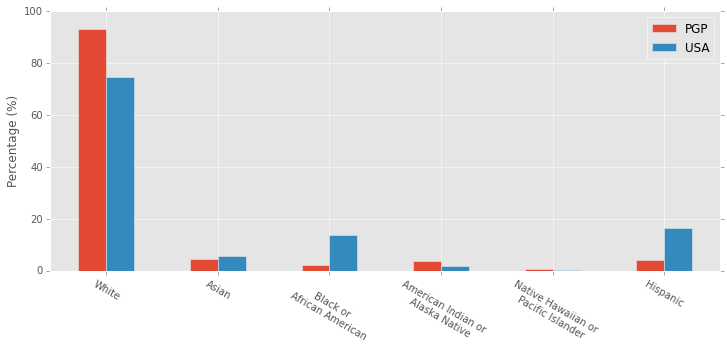

In [7]:
# Plot data to compare distribution of PGP participants vs general population

ax = raceCompare.plot(kind='bar')
labels = ax.get_xticklabels()
ax.set_xticklabels(['White','Asian','Black or\n African American',
                    'American Indian or\n Alaska Native', 'Native Hawaiian or\n Pacific Islander', 'Hispanic'],
                   rotation=330,fontsize = 10, multialignment = 'center') 

ax.set_ylabel('Percentage (%)')

plt.gcf().subplots_adjust(bottom=0.3)
plt.savefig('Images/barplotEthnicity.png',format='png')